In [21]:
import pandas as pd

# 1. مسار الملف
file_path = r"C:\Users\abdul\OneDrive\سطح المكتب\Project\Timeseries_2022.csv"

# 2. قراءة الملف باستخدام الفاصلة كفاصل، وتخطي 10 أسطر أولية
df = pd.read_csv(file_path, skiprows=10, sep=",", engine='python')

# 3. التحقق من الأعمدة
print("✅ Column names:")
print(df.columns)

# 4. عرض أول 5 صفوف من البيانات
print("\n📊 First 5 rows:")
print(df.head())


✅ Column names:
Index(['time', 'P', 'G(i)', 'H_sun', 'T2m', 'WS10m', 'Int'], dtype='object')

📊 First 5 rows:
            time    P  G(i)  H_sun    T2m  WS10m  Int
0  20220101:0010  0.0   0.0    0.0  11.26   3.31  0.0
1  20220101:0110  0.0   0.0    0.0  10.64   3.31  0.0
2  20220101:0210  0.0   0.0    0.0  10.31   3.52  0.0
3  20220101:0310  0.0   0.0    0.0   9.90   3.72  0.0
4  20220101:0410  0.0   0.0    0.0   9.53   3.86  0.0


In [23]:
# === إعداد معطيات النظام الشمسي ===
panel_area = 2.56         # مساحة اللوح الواحد (م²)
panel_efficiency = 0.156  # كفاءة اللوح
num_panels = 1000         # عدد الألواح الشمسية

# === تحويل القيم إلى float إذا لزم ===
df['G(i)'] = pd.to_numeric(df['G(i)'], errors='coerce')

# === حساب إنتاج كل ساعة (kWh) ===
df['E_solar_kWh'] = num_panels * panel_area * panel_efficiency * df['G(i)'] / 1000

# === حساب إجمالي الإنتاج السنوي ===
total_production = df['E_solar_kWh'].sum()
print(f"\n☀️ Total annual solar energy: {total_production:.2f} kWh for {num_panels} panels")

# === عرض أول 5 نتائج كمثال ===
print("\n🔍 Sample hourly production:")
print(df[['time', 'G(i)', 'E_solar_kWh']].head())



☀️ Total annual solar energy: 592322.67 kWh for 1000 panels

🔍 Sample hourly production:
            time  G(i)  E_solar_kWh
0  20220101:0010   0.0          0.0
1  20220101:0110   0.0          0.0
2  20220101:0210   0.0          0.0
3  20220101:0310   0.0          0.0
4  20220101:0410   0.0          0.0


C:\Users\abdul\AppData\Local\Temp\ipykernel_19476\4214180533.py:37: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


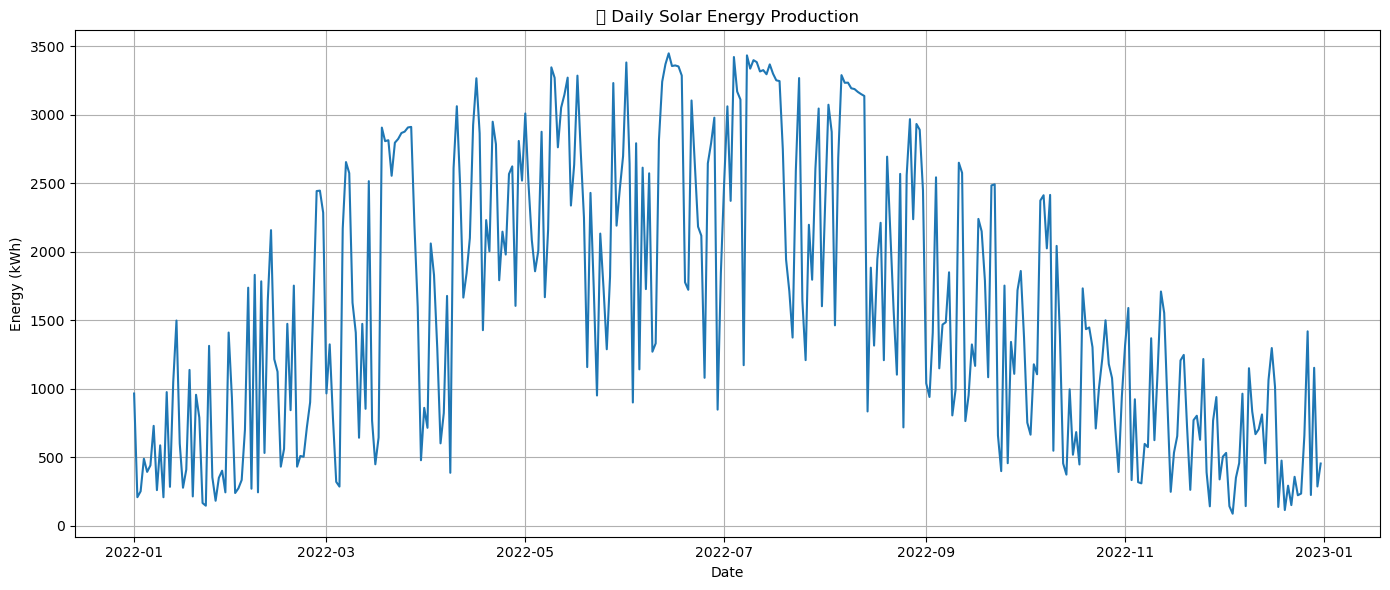

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# === تأكد من مسار الملف ===
file_path = r"C:\Users\abdul\OneDrive\سطح المكتب\Project\Timeseries_2022.csv"

# === قراءة البيانات ===
df = pd.read_csv(file_path, skiprows=10, sep=",", engine='python')

# === حذف الصفوف التي فيها نصوص أو رؤوس مكررة في عمود الوقت ===
df = df[~df['time'].str.contains(":", na=False)]  # يتخلص من أي صفوص فيها نصوص مثل "P: PV ..."

# === إعادة قراءة الملف من جديد بعد التأكد من الأرقام فقط ===
df = pd.read_csv(file_path, skiprows=10, sep=",", engine='python', on_bad_lines='skip')

# === تحويل الوقت إلى datetime بعد التأكد من نظافة البيانات ===
df['time'] = pd.to_datetime(df['time'], format='%Y%m%d:%H%M', errors='coerce')

# === حذف الصفوف التي فشل تحويلها (وقت غير صحيح) ===
df = df.dropna(subset=['time'])

# === تحويل الإشعاع إلى رقم والتحقق منه ===
df['G(i)'] = pd.to_numeric(df['G(i)'], errors='coerce')
df['E_solar_kWh'] = 1000 * 2.56 * 0.156 * df['G(i)'] / 1000

# === استخراج التاريخ اليومي ===
df['date'] = df['time'].dt.date
daily_production = df.groupby('date')['E_solar_kWh'].sum()

# === رسم الرسم البياني اليومي ===
plt.figure(figsize=(14, 6))
plt.plot(daily_production.index, daily_production.values)
plt.title("📅 Daily Solar Energy Production")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\abdul\AppData\Local\Temp\ipykernel_19476\3068128173.py:16: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


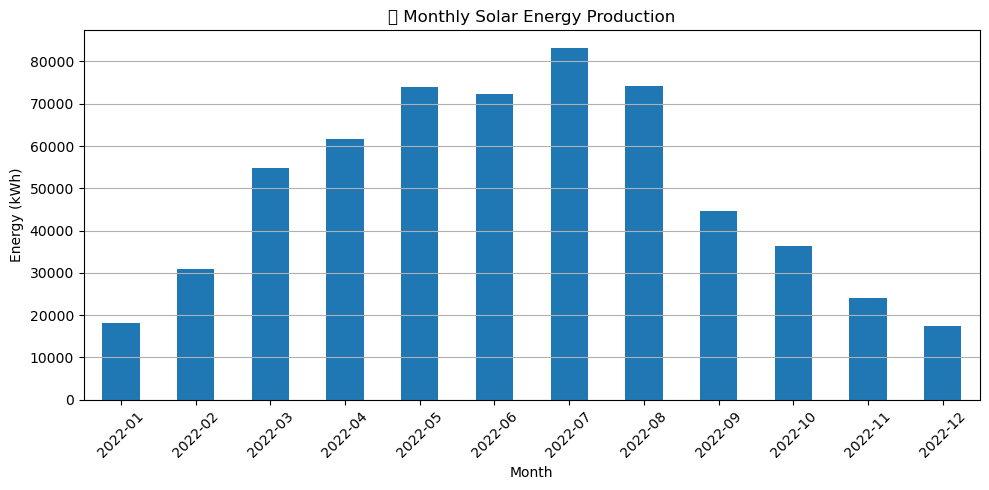

In [29]:
# تحويل الوقت إلى شهر-سنة
df['month'] = df['time'].dt.to_period('M')

# تجميع الإنتاج الشهري
monthly_production = df.groupby('month')['E_solar_kWh'].sum()

# رسم البيانات الشهرية
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
monthly_production.plot(kind='bar')
plt.title("📆 Monthly Solar Energy Production")
plt.xlabel("Month")
plt.ylabel("Energy (kWh)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


             datetime    demand_kW
0 2022-01-01 00:00:00  1577.990095
1 2022-01-01 01:00:00  1457.713639
2 2022-01-01 02:00:00  1398.366649
3 2022-01-01 03:00:00  1525.732159
4 2022-01-01 04:00:00  1393.581950


C:\Users\abdul\AppData\Local\Temp\ipykernel_7580\1131318844.py:23: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\abdul\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128268 (\N{ELECTRIC PLUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


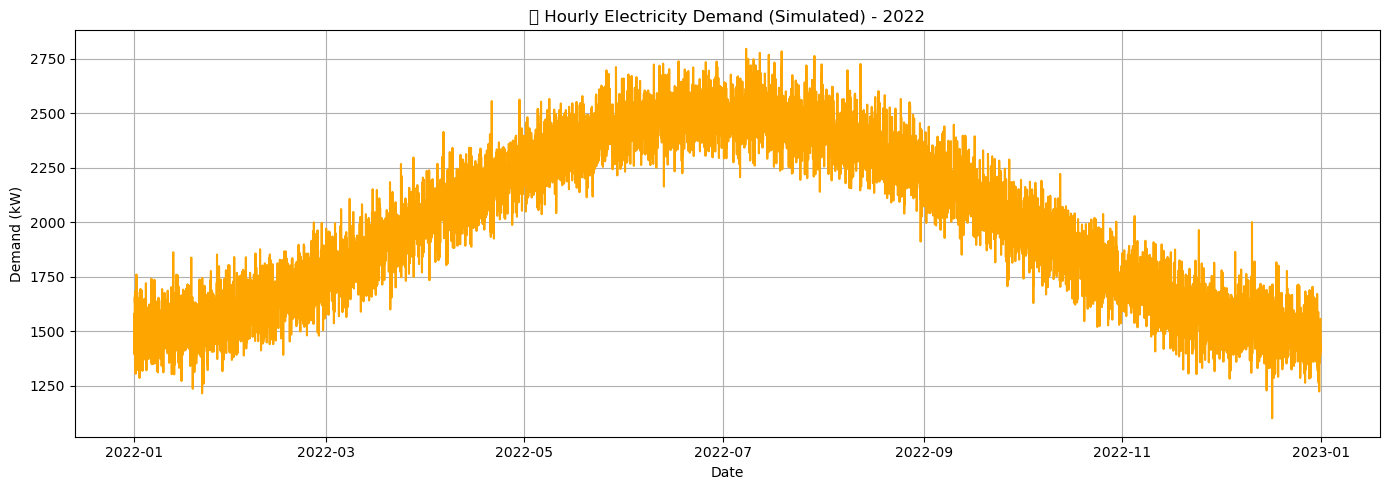

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. تحديد مسار الملف ===
file_path = r"C:\Users\abdul\OneDrive\سطح المكتب\Project\hourly_demand_2022.csv"

# === 2. قراءة الملف ===
df_demand = pd.read_csv(file_path)

# === 3. تحويل الوقت إلى تنسيق datetime
df_demand['datetime'] = pd.to_datetime(df_demand['datetime'])

# === 4. عرض أول 5 صفوف للتأكد
print(df_demand.head())

# === 5. رسم الطلب الساعي
plt.figure(figsize=(14, 5))
plt.plot(df_demand['datetime'], df_demand['demand_kW'], color='orange')
plt.title("🔌 Hourly Electricity Demand (Simulated) - 2022")
plt.xlabel("Date")
plt.ylabel("Demand (kW)")
plt.grid(True)
plt.tight_layout()
plt.show()
